## Project - 3 
(Winter Semester 2022 - 2023)\
Regression Analysis

In [160]:
import pandas as pd
import os

# Plotting
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

In [161]:
# Creating a directory for plots if it doesn't exist

if not os.path.isdir('Plots'):
    os.mkdir("Plots")

In [162]:
# Read dataset
data = pd.read_csv("bodymeasurements.csv")
data

,Age,Sex,ID,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
0,21,m,1,174.0,89.5,71.5,51.5,34.5,36.5,23.5,32.5,16.5,65.6
1,23,m,2,175.3,97.0,79.0,51.5,36.5,37.5,24.5,34.4,17.0,71.8
2,28,m,3,193.5,97.5,83.2,57.3,37.0,37.3,21.9,33.4,16.9,80.7
3,23,m,4,186.5,97.0,77.8,53.0,37.0,34.8,23.0,31.0,16.6,72.6
4,22,m,5,187.2,97.5,80.0,55.4,37.7,38.6,24.4,32.0,18.0,78.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,29,f,420,176.5,91.8,69.9,60.6,37.7,37.9,22.4,30.3,15.4,71.8
420,21,f,421,164.4,87.3,63.5,55.2,35.6,33.3,22.4,30.1,15.2,55.5
421,33,f,422,160.7,78.1,57.9,51.8,34.4,34.1,21.2,27.4,15.5,48.6
422,33,f,423,174.0,90.9,72.2,59.0,38.4,36.6,22.0,30.6,15.5,66.4


In [163]:
# Checking nans
nan_rows = data[data.isnull().any(axis=1)]
print("NAN Rows: ", len(nan_rows))

NAN Rows:  0


In [164]:
# Check the columns
list(data.columns)

['Age',
 'Sex',
 'ID',
 'Height',
 'Chest',
 'Belly',
 'Thigh',
 'Knee',
 'Calf',
 'Ankle',
 'Biceps',
 'Wrist',
 'Weight']

In [165]:
# We see that 'ID' column is of no use so we drop the ID column
df = data.drop('ID', axis=1)
df.head()

,Age,Sex,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
0,21,m,174.0,89.5,71.5,51.5,34.5,36.5,23.5,32.5,16.5,65.6
1,23,m,175.3,97.0,79.0,51.5,36.5,37.5,24.5,34.4,17.0,71.8
2,28,m,193.5,97.5,83.2,57.3,37.0,37.3,21.9,33.4,16.9,80.7
3,23,m,186.5,97.0,77.8,53.0,37.0,34.8,23.0,31.0,16.6,72.6
4,22,m,187.2,97.5,80.0,55.4,37.7,38.6,24.4,32.0,18.0,78.8


### Check the distribution of data

In [166]:
round(df.describe(), 2)

,Age,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
count,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00
mean,26.90,170.88,92.22,75.28,56.82,36.01,35.88,22.03,30.83,15.97,67.82
std,5.85,9.40,9.60,9.90,4.43,2.54,2.76,1.85,4.27,1.35,12.74
min,18.00,147.20,72.60,57.90,46.30,29.00,28.40,16.40,22.40,13.00,42.00
25%,22.00,163.20,84.78,67.50,53.70,34.30,34.00,20.90,27.28,14.88,57.30
50%,25.00,170.20,90.95,74.10,56.30,35.90,35.80,21.90,30.35,15.90,66.80
75%,31.25,177.80,99.82,82.00,59.50,37.70,37.70,23.10,34.12,17.00,75.62
max,40.00,198.10,116.70,113.20,75.70,45.70,45.00,29.30,42.40,19.60,105.20


In [167]:
df.shape

(424, 12)

<Figure size 1500x1000 with 0 Axes>

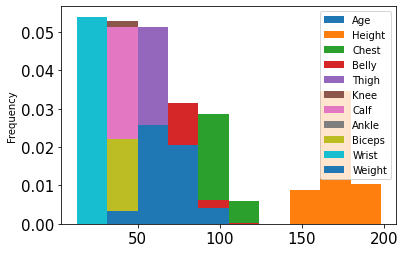

In [168]:
# Histogram plot

plt.figure(figsize=(15, 10), dpi=100)
freq_dist_fig = df.plot(kind = "hist", density = True, bins=10)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
#plt.xlabel('Time in seconds', fontsize=15)
#plt.ylabel('Frequency', fontsize=15)
plt.show()
freq_dist_fig.figure.savefig('Plots/Hist.pdf')

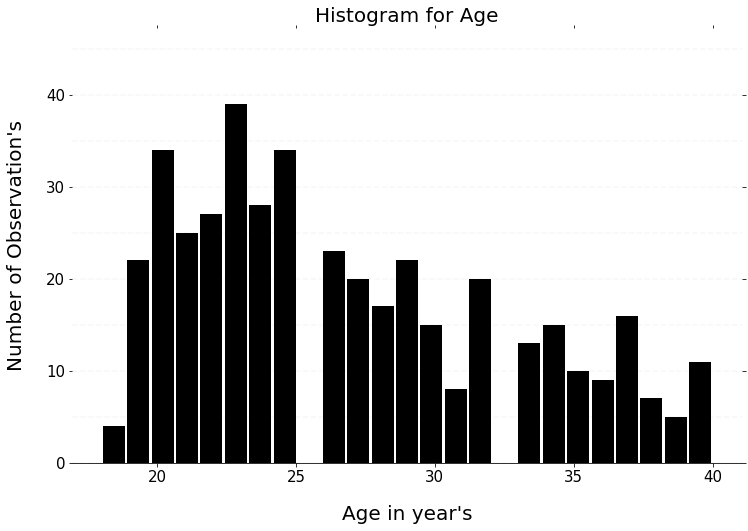

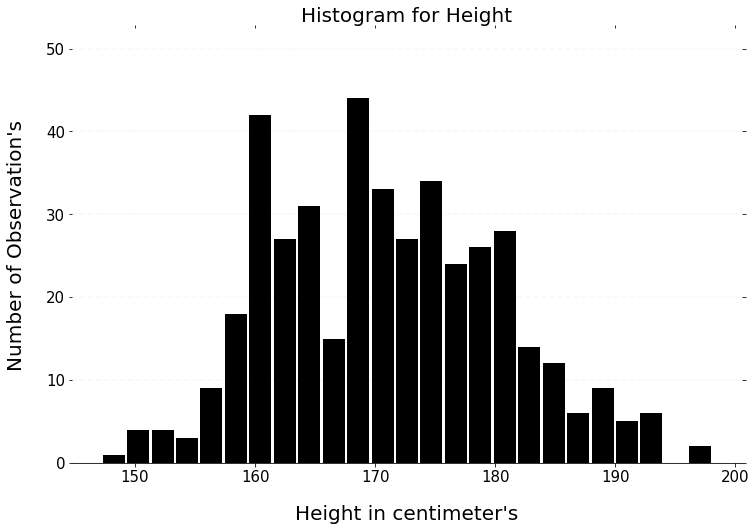

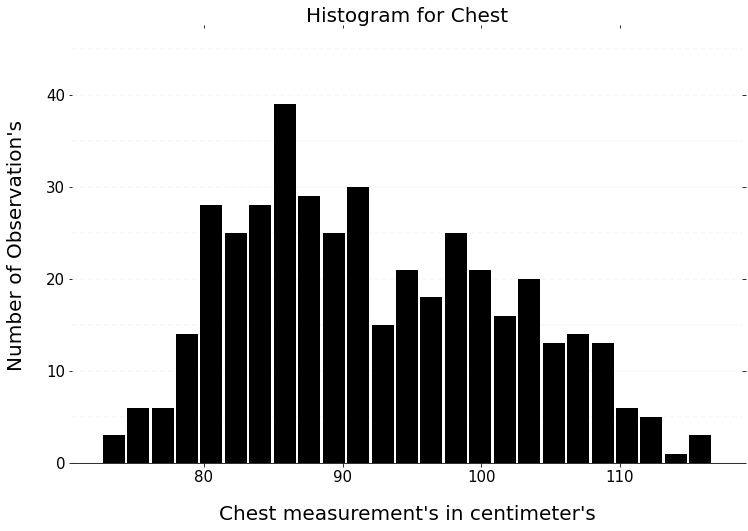

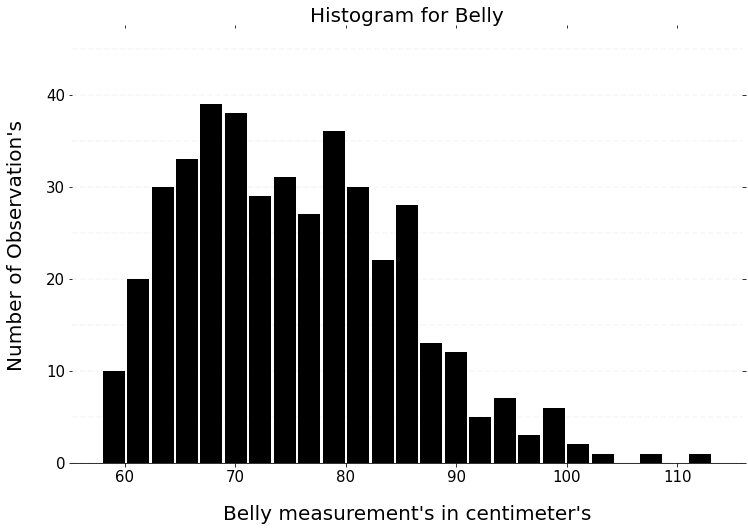

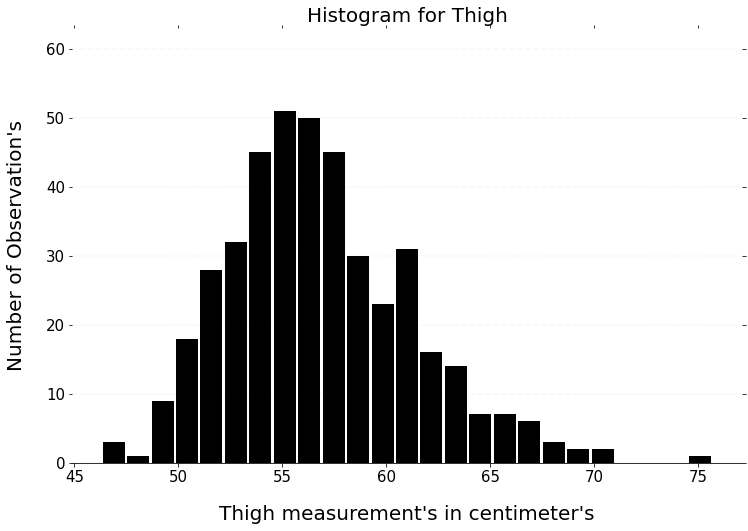

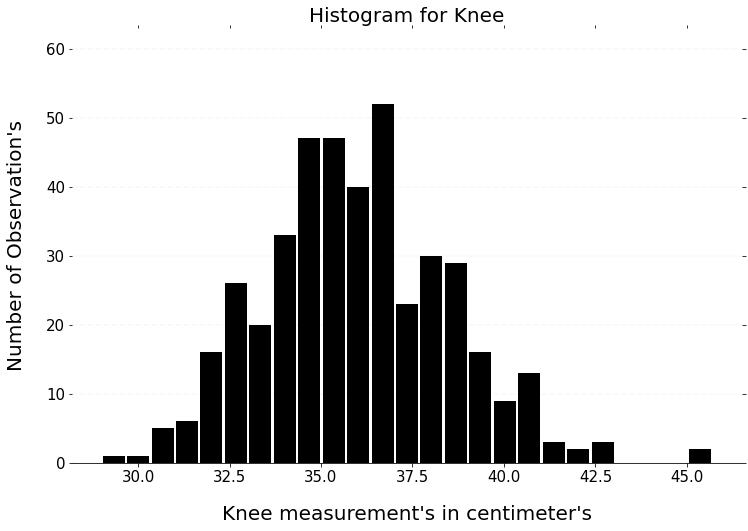

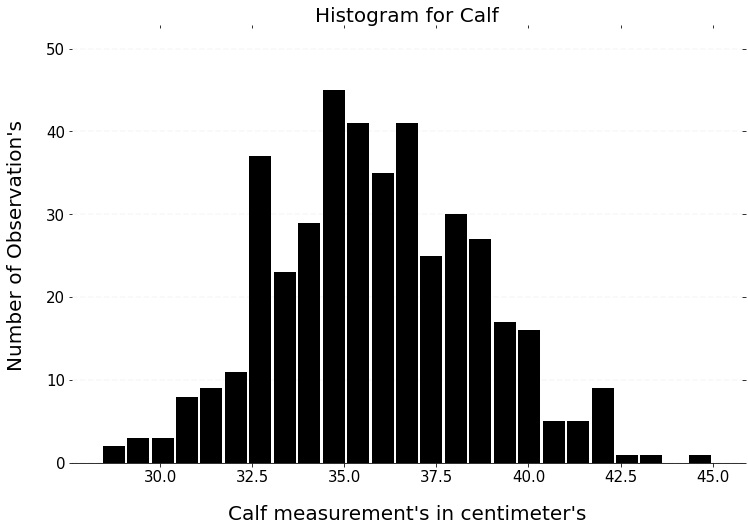

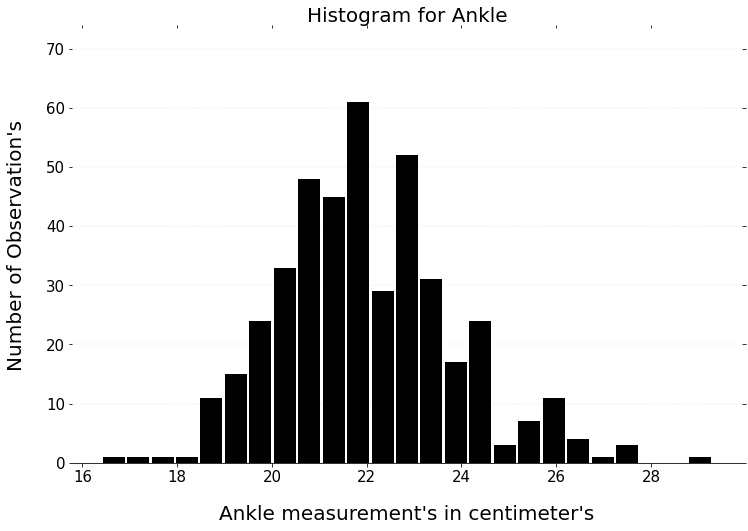

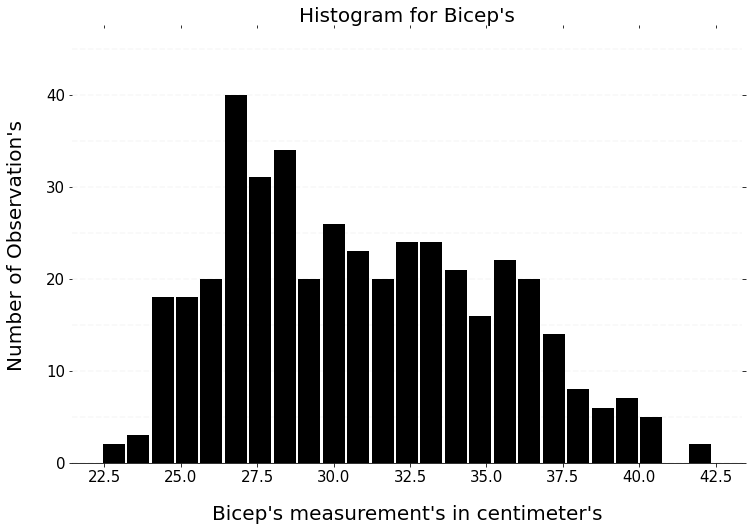

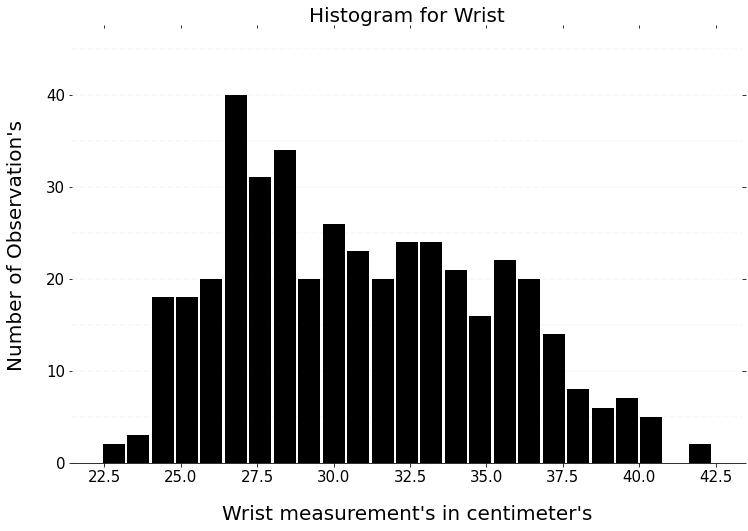

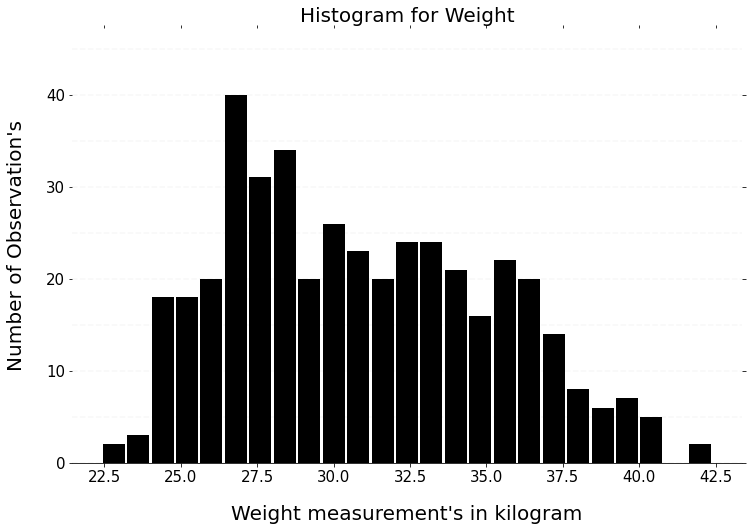

In [170]:
# Histogram for Age

ax = df.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Age", size=20)

    # Set x-axis label
    x.set_xlabel("Age in year's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Height

ax = df.hist(column='Height', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Height", size=20)

    # Set x-axis label
    x.set_xlabel("Height in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Chest

ax = df.hist(column='Chest', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Chest", size=20)

    # Set x-axis label
    x.set_xlabel("Chest measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Belly

ax = df.hist(column='Belly', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Belly", size=20)

    # Set x-axis label
    x.set_xlabel("Belly measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Belly

ax = df.hist(column='Thigh', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Thigh", size=20)

    # Set x-axis label
    x.set_xlabel("Thigh measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Knee

ax = df.hist(column='Knee', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Knee", size=20)

    # Set x-axis label
    x.set_xlabel("Knee measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Calf

ax = df.hist(column='Calf', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Calf", size=20)

    # Set x-axis label
    x.set_xlabel("Calf measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Ankle

ax = df.hist(column='Ankle', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Ankle", size=20)

    # Set x-axis label
    x.set_xlabel("Ankle measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Biceps

ax = df.hist(column='Biceps', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Bicep's", size=20)

    # Set x-axis label
    x.set_xlabel("Bicep's measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Wrist

ax = df.hist(column='Biceps', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Wrist", size=20)

    # Set x-axis label
    x.set_xlabel("Wrist measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Weight

ax = df.hist(column='Biceps', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Weight", size=20)

    # Set x-axis label
    x.set_xlabel("Weight measurement's in kilogram", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))            